In [63]:
from scipy import fft
import numpy as np

In [64]:
import matplotlib.pyplot as plt

In [301]:
f_message = 5.
f_carrier  = 100.
N = 2000 # Sample numbers
T = 1/2000 # Sample spacing
timezone = np.linspace(-N*T/2, N*T/2, N)

In [302]:
sig_message = np.sin(2*np.pi * f_message * timezone)
sig_carrier  = np.sin(2*np.pi * f_carrier  * timezone)

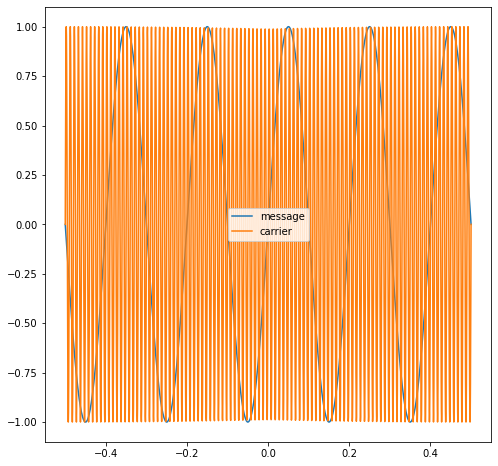

In [303]:

figure = plt.figure(figsize=(8,8))
ax = figure.add_subplot()
ax.plot(timezone, sig_message)
ax.plot(timezone, sig_carrier)
ax.legend(["message", "carrier"])
plt.show()

AM Modulateion

$$AM = (1+ \frac{m(t)}{A}) \cdot A \sin(2 \pi f_s t + \phi)$$


$M := max(m(t))$, $A := max(s(t))$, 
$$ m := \frac{M}{A}$$

$m$ is a modulate sensitivity

In [304]:
A = np.max(np.abs(sig_carrier))
M = np.max(np.abs(sig_message))
m = M/A

In [305]:
signal_am = (1 + sig_message/A)*sig_carrier

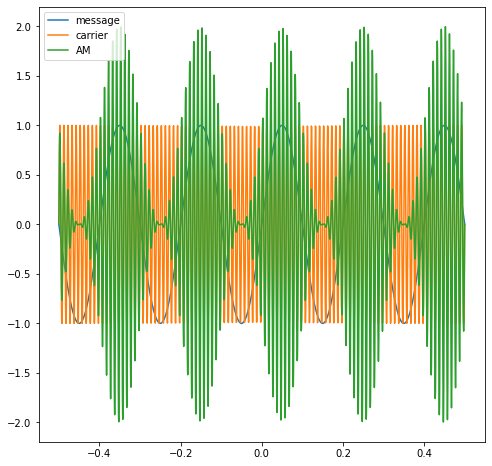

In [306]:
# AM modulation
figure = plt.figure(figsize=(8,8))
ax = figure.add_subplot()
ax.plot(timezone, sig_message)
ax.plot(timezone, sig_carrier)
ax.plot(timezone, signal_am)
ax.legend(["message", "carrier", "AM"])
plt.show()

# FM 

$$ A \sin(2 \pi (f_c + s*m(t)) t)$$

In [307]:
s = 3
TWOPI = 2*np.pi

In [310]:
signal_fm = np.cos(TWOPI* (f_carrier * timezone + s * sig_message)+ 0.5*TWOPI* (f_carrier))

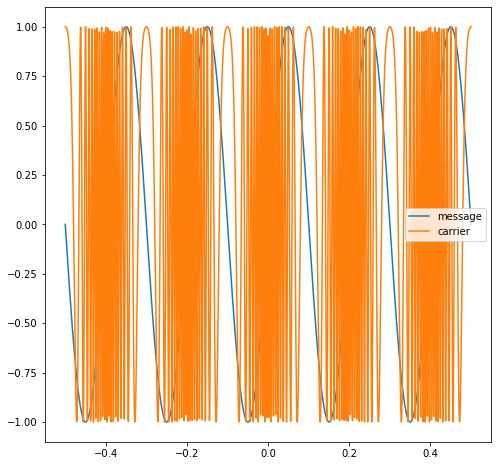

In [311]:
# AM modulation
figure = plt.figure(figsize=(8,8))
ax = figure.add_subplot()
ax.plot(timezone, sig_message)
#ax.plot(timezone, sig_carrier)
#ax.plot(timezone, signal_am)
ax.plot(timezone, signal_fm)
ax.legend(["message", "carrier", "AM", "FM"])
plt.show()

Demodulation with product detector and low pass filter

In [146]:
ft_car = 2*np.pi * f_carrier *timezone
signal_y = signal_am * (np.sin(ft_car ) * np.power(np.cos(ft_car ), 2))

c:\Users\Hyunseong\miniconda3\envs\uilc\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


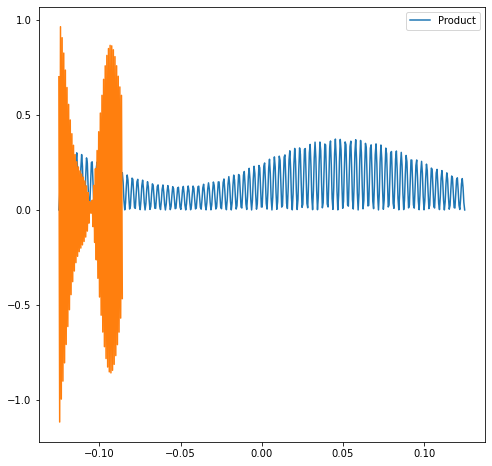

In [194]:
figure = plt.figure(figsize=(8,8))
ax = figure.add_subplot()
ax.plot(timezone, signal_y)
ax.plot(timezone[:79], ifft(passed_fft_y)*N)
ax.legend(["Product"])
plt.show()

In [148]:
from scipy.fft import fft, fftfreq, fftshift

c:\Users\Hyunseong\miniconda3\envs\uilc\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\Hyunseong\miniconda3\envs\uilc\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Hyunseong\AppData\Local\Temp\ipykernel_3828\2099351439.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


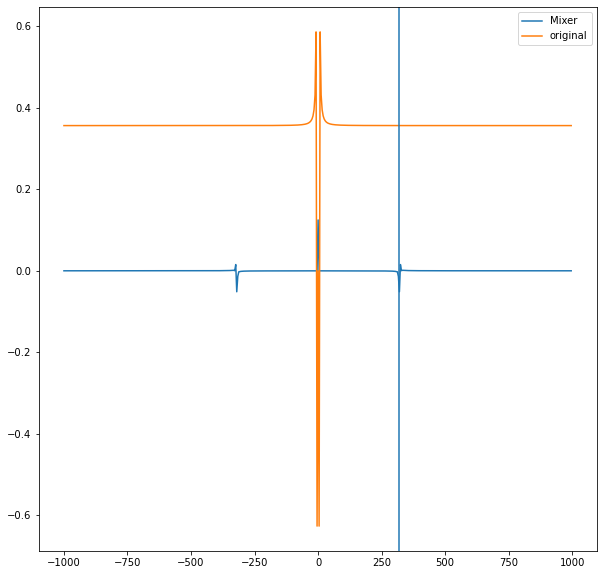

In [178]:
# Fourier Transform
fft_y = fft(signal_y)/N
fft_y = fftshift(fft_y)

fft_message = fft(sig_message)
fft_message = fftshift(fft_message)

freq = fftfreq(N, T)
freq = fftshift(freq)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

ax.plot(freq, fft_y)
ax.plot(freq, fft_message)

ax.legend(["Mixer", "original"])
#ax.set_xlim(left=-50., right = 50.)
ax.axvline(x = 4*f_carrier)
fig.show()

In [179]:
fft_y

array([-2.11256257e-07+0.00000000e+00j, -2.09351636e-07-4.78357818e-07j,
       -2.03636903e-07-9.56828928e-07j, -1.94109439e-07-1.43552672e-06j,
       -1.80764879e-07-1.91456474e-06j, -1.63597104e-07-2.39405684e-06j,
       -1.42598237e-07-2.87411720e-06j, -1.17758632e-07-3.35486048e-06j,
       -8.90668661e-08-3.83640186e-06j, -5.65097257e-08-4.31885717e-06j,
       -2.00721929e-08-4.80234298e-06j,  2.02625709e-08-5.28697666e-06j,
        6.45132426e-08-5.77287653e-06j,  1.12700358e-07-6.26016191e-06j,
        1.64846334e-07-6.74895326e-06j,  2.20975494e-07-7.23937224e-06j,
        2.81114091e-07-7.73154185e-06j,  3.45290342e-07-8.22558650e-06j,
        4.13534452e-07-8.72163217e-06j,  4.85878655e-07-9.21980646e-06j,
        5.62357245e-07-9.72023874e-06j,  6.43006614e-07-1.02230603e-05j,
        7.27865295e-07-1.07284042e-05j,  8.16974007e-07-1.12364061e-05j,
        9.10375697e-07-1.17472033e-05j,  1.00811559e-06-1.22609360e-05j,
        1.11024125e-06-1.27777466e-05j,  1.21680262

In [187]:
passed_index = np.where(np.abs(freq) < 2*f_carrier)
passed_freq = freq[passed_index]
passed_fft_y = fft_y[passed_index]

c:\Users\Hyunseong\miniconda3\envs\uilc\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Hyunseong\AppData\Local\Temp\ipykernel_3828\2638337966.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


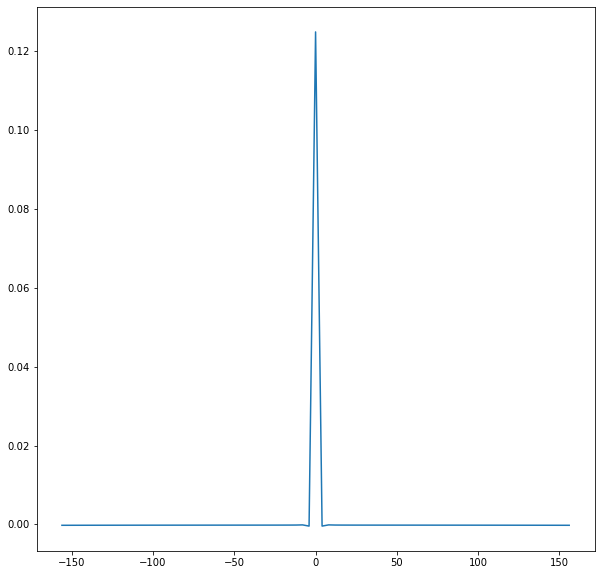

In [188]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

ax.plot(passed_freq , passed_fft_y)
#ax.legend(["Mixer", "original"])
#ax.set_xlim(left=-50., right = 50.)
#ax.axvline(x = 4*f_carrier)
fig.show()

In [185]:
from scipy.fft import ifft

In [186]:
ifft(passed_fft_y)

array([-1.75163158e-04-4.39170500e-20j, -6.57373847e-04+2.61555719e-05j,
        3.57304460e-04-2.84779223e-05j, -4.25795415e-04+5.10401903e-05j,
        2.56356215e-04-4.11255136e-05j, -2.55988628e-04+5.15810499e-05j,
        1.19080432e-04-2.89645837e-05j, -9.33087816e-05+2.66666472e-05j,
       -2.59216335e-05+8.53656261e-06j,  6.13980024e-05-2.29635031e-05j,
       -1.65557443e-04+6.95422992e-05j,  2.01762407e-04-9.43548326e-05j,
       -2.90205528e-04+1.50054285e-04j,  3.21049030e-04-1.82531372e-04j,
       -3.92370788e-04+2.44217279e-04j,  4.13640297e-04-2.80869257e-04j,
       -4.66680322e-04+3.44767147e-04j,  4.75738850e-04-3.81604835e-04j,
       -5.10066319e-04+4.43591766e-04j,  5.05738602e-04-4.76436304e-04j,
       -5.21880912e-04+5.32362279e-04j,  5.04361068e-04-5.57172052e-04j,
       -5.03866519e-04+6.03186057e-04j,  4.74586239e-04-6.16375462e-04j,
       -4.59961055e-04+6.49230839e-04j,  4.21398521e-04-6.47956220e-04j,
       -3.95944311e-04+6.65271661e-04j,  3.51374029